## 환경설정

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%pip install  koreanize_matplotlib -q
import koreanize_matplotlib

%pip install konlpy wordcloud
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.6/496.6 kB 36.5 MB/s eta 0:00:00


In [ ]:
polls_question = pd.read_csv('/content/polls_question.csv')

In [ ]:
# 나눔글꼴 설치 (Colab 기준)
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


## 워드 클라우드

In [ ]:
# 모든 질문 텍스트 수집
texts = polls_question['question_text'].dropna().tolist()

# 단어 분리 및 명사 추출
okt = Okt()
words = []
for sentence in texts:
    tokens = okt.nouns(sentence)
    words.extend(tokens)

In [ ]:
# 직접 필터링할 단어 처리
custom_stopwords = [
    '되었', '하고', '하나', '뭔가', '누군가', '누가'
]

In [ ]:
# 단어 필터링
filtered_words = [word for word in words if word not in custom_stopwords and len(word) > 1]


# 빈도 계산
word_freq = Counter(filtered_words)

In [ ]:
# 워드클라우드 생성
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(word_freq)

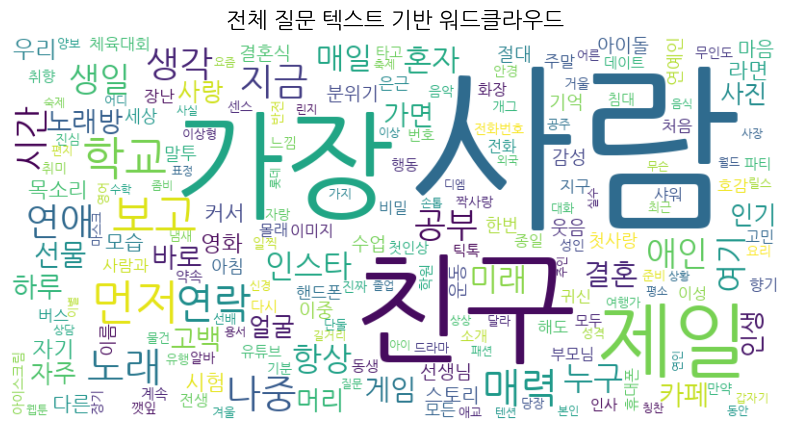

In [ ]:
# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("전체 질문 텍스트 기반 워드클라우드", fontsize=16)
plt.show()

In [ ]:
# 가장 많이 등장한 상위 15개 단어 출력
for word, count in word_freq.most_common(15):
    print(f"{word}: {count}")

사람: 2864
친구: 981
가장: 926
제일: 347
먼저: 59
학교: 53
보고: 52
매력: 41
연락: 41
노래: 40
나중: 37
연애: 36
지금: 36
생각: 35
시간: 33


In [ ]:
freq_df = pd.DataFrame(word_freq.items(), columns=['단어', '빈도'])
freq_df_sorted = freq_df.sort_values(by='빈도', ascending=False).reset_index(drop=True)

freq_df_sorted.head()

,단어,빈도
0,사람,2864
1,친구,981
2,가장,926
3,제일,347
4,먼저,59


### 질문 워드클라우드 분석 결과

*주요 키워드: 사람, 친구, 가장, 제일, 먼저, 학교, 매력, 연락, 연애 등*


*   전반적으로 친구 관계, 인간관계, 감정과 관련된 질문이 많음.
*   게임, 카페, 인스타 등 취미/여가 관련 키워드도 다수 등장.
*   먼저, 제일, 가장 등 비교·우선순위를 묻는 형식이 많음 → 앱 내 질문 패턴에서 랭킹, 선택형 기능 선호 가능성 높음


----

## 태블로 시각화

https://public.tableau.com/views/codeit_fp/sheet5?:language=ko-KR&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

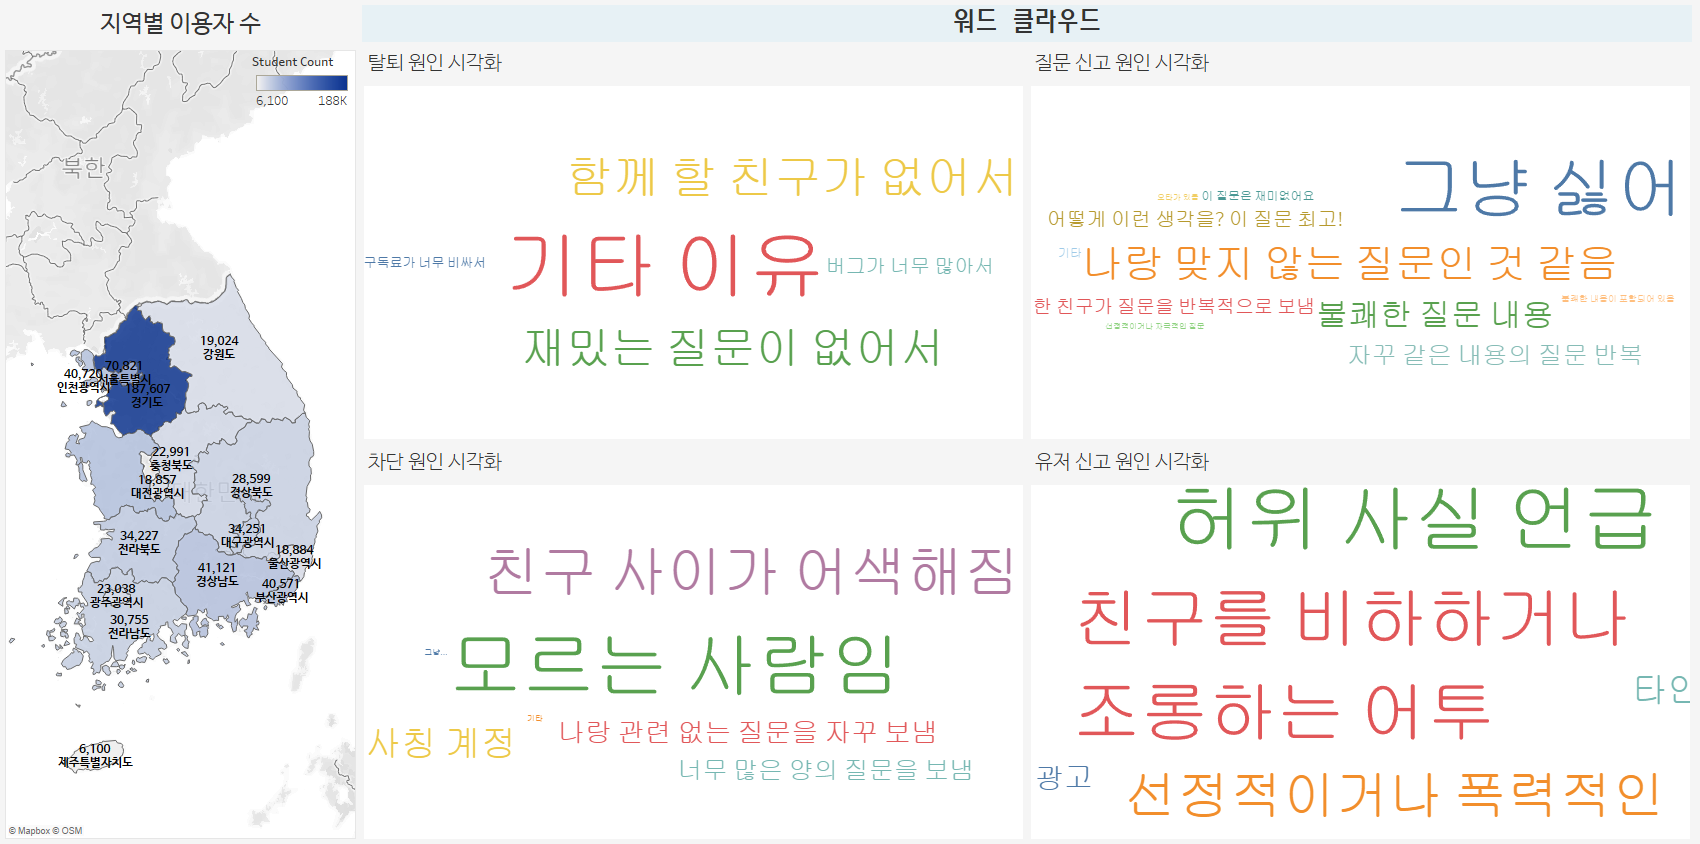

### 태블로 분석 결과

지역별 이용자 분포
* 경기도, 서울, 인천 등 수도권에 이용자가 집중됨.

* 지방권에서는 부산, 대구, 광주, 울산, 대전 순으로 규모가 있음.

* 제주도는 상대적으로 이용자 수가 낮음 → 마케팅이나 이벤트 필요.

이탈(탈퇴) 이유
* 기타 이유가 가장 많음 → 세부 분류 필요.

* 함께 할 친구가 없음, 재미있는 질문 부족, 버그 등의 키워드 다수
→ 네트워크 효과 부족 & 콘텐츠 품질 문제.

질문 신고 이유
* 그냥 싫어, 나랑 맞지 않는 질문, 불쾌한 질문, 반복 → 질문 품질 관리와 추천 알고리즘 개선 필요.

유저 신고 이유
* 허위 사실, 친구 비하/조롱, 선정적/폭력적 내용 → 커뮤니티 규칙 강화, 필터링 필요.

차단 이유
* 모르는 사람, 친구 사이가 어색해짐, 사칭 계정 → 신뢰도 검증 기능 및 관계 관리 기능 필요.

----

## 앱 개선 전략

1.질문 콘텐츠 개선
* 추천 알고리즘 고도화: 사용자의 관심사와 과거 반응을 기반으로 맞춤형 질문 제공.
* 콘텐츠 큐레이션: 상위 인기 질문, 주제별 질문 카테고리, 시즌 이벤트 질문(예:여름/겨울, 시험기간, 명절 등).
* 반복·불쾌 질문 필터링: NLP 기반 유해·중복 질문 자동 감지 후 차단.


2.네트워크 효과 강화
* 친구 초대 보상: 초대 성공 시 포인트·뱃지 제공.
* 지역·학교 기반 그룹: 같은 지역/학교 사용자끼리 질문·투표할 수 있는 기능.
* 랜덤 매칭 기능: 관심사 기반으로 새로운 친구 추천.


3.커뮤니티 안전 강화
* 유해 콘텐츠 필터링: 키워드 필터 + AI 이미지/텍스트 분석.
* 신뢰도 지수 도입: 신고·차단 이력에 따른 가시적 신뢰 지표 제공.
* 사칭 방지: 간단한 인증(학교 이메일, 휴대폰 인증) 기능.


4.지역별 맞춤 전략
* 수도권 외 지역은 현지 이벤트/오프라인 홍보 강화.
* 제주·강원·전북 등 낮은 참여 지역에 소규모 챌린지나 리워드 캠페인 진행.


5.버그 및 UX 개선
* 불편사항 신고 채널 간소화 → 빠른 피드백 제공.
* 앱 내 설문을 통해 지속적으로 UX 개선 포인트 수집.